# MIS780 Advanced AI For Business - Assignment 2 - T2 2024

## Task Number 2: Waste classification with image data

**Student Name:** Sachin Bhat

**Student ID:** 218676233

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)

5. [References](#cell_report)


<a id = "cell_Summary"></a>
## 1. Executive Summary

Waste classification is essential for waste management companies, directly impacting recycling efficiency and sustainability efforts. Automating this process can significantly reduce manual labor and improve the accuracy of waste separation, leading to higher recycling rates and operational cost savings. This project focuses on developing an automated waste classification system using advanced Convolutional Neural Network (CNN) techniques to classify waste into six categories: cardboard, glass, metal, paper, plastic, and vegetation.

The dataset for this project consists of 2,864 images, equally distributed among the six waste types. Each image was pre-processed to ensure consistent size (100x100 pixels) and normalized to optimize the model's learning efficiency. The dataset was split into training and test sets with a 70/30 ratio.

We used a CNN model as it is ideal for image classification due to its ability to learn spatial patterns. We experimented with various architectures by adjusting the number of convolutional layers, hidden layers, hidden nodes, pooling layers, dropout rates, and the size of the kernels. The aim was to identify the model that offered the best performance.

The best model (**CNN 6**), featuring 4 convolutional layers followed by 3 max-pooling and 2 hidden layers, achieved a test accuracy of 77.79% and a Kappa score of 0.733, reflecting a strong alignment between the model’s predictions and the actual labels. The Vegetation class had the highest accuracy, with 121 out of 122 samples correctly classified. In contrast, the Plastic class was the most challenging, with only 99 out of 155 samples correctly identified, likely due to visual similarities with materials like Cardboard and Paper.

While the model presents a solid solution for automating the waste sorting process, there is room for improvement. Techniques such as data augmentation and using pre-trained models are recommended to enhance real-world performance and address misclassifications, particularly in classes like Plastic.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf

print("Available GPUs: ", tf.config.list_physical_devices('GPU'))

Available GPUs:  []


In [ ]:
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# to show the folders under the dataset
!ls "/content/drive/MyDrive/Colab Notebooks/MIS780 Advanced AI/Assignment 2/Part2_WasteImages"

Mounted at /content/drive
Cardboard  Glass  Metal  Paper	Plastic  Vegetation


In [ ]:
import os

# Set the paths to the folders containing the image files for each class
cardboard_path = '/content/drive/MyDrive/Colab Notebooks/MIS780 Advanced AI/Assignment 2/Part2_WasteImages/Cardboard'
glass_path = '/content/drive/MyDrive/Colab Notebooks/MIS780 Advanced AI/Assignment 2/Part2_WasteImages/Glass'
metal_path = '/content/drive/MyDrive/Colab Notebooks/MIS780 Advanced AI/Assignment 2/Part2_WasteImages/Metal'
paper_path = '/content/drive/MyDrive/Colab Notebooks/MIS780 Advanced AI/Assignment 2/Part2_WasteImages/Paper'
plastic_path = '/content/drive/MyDrive/Colab Notebooks/MIS780 Advanced AI/Assignment 2/Part2_WasteImages/Plastic'
vegetation_path = '/content/drive/MyDrive/Colab Notebooks/MIS780 Advanced AI/Assignment 2/Part2_WasteImages/Vegetation'

# Check the number of files in each folder
for path, label in zip([cardboard_path, glass_path, metal_path, paper_path, plastic_path, vegetation_path],
                       ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Vegetation']):
    print(f'Total number of files in {label} folder: {len(os.listdir(path))}')

print('Total number of files: 2864')

Total number of files in Cardboard folder: 461
Total number of files in Glass folder: 420
Total number of files in Metal folder: 547
Total number of files in Paper folder: 500
Total number of files in Plastic folder: 500
Total number of files in Vegetation folder: 436
Total number of files: 2864


In [ ]:
# Creating a list to store the image data and labels
data = []

In [ ]:
# Writing a function to load images from the folder
def load_images_from_folder(folder_path, label):
    for file in os.listdir(folder_path):
        if file.endswith('.jpeg') or file.endswith('.jpg'):
            img = tf.io.read_file(os.path.join(folder_path, file))
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, (100, 100))
            data.append((img, label))

# Load images for each class
load_images_from_folder(cardboard_path, 'Cardboard')
load_images_from_folder(glass_path, 'Glass')
load_images_from_folder(metal_path, 'Metal')
load_images_from_folder(paper_path, 'Paper')
load_images_from_folder(plastic_path, 'Plastic')
load_images_from_folder(vegetation_path, 'Vegetation')

# Shuffle the data
random.shuffle(data)

# Extract image data and labels
X, Y = zip(*data)
X = np.array(X)
Y = np.array(Y)

Encoding the labels

The images were assigned labels based on their categories, with each label converted into a number (e.g., Cardboard = 0, Glass = 1, and so on). After that, the labels were one-hot encoded, which turned them into a binary matrix format. This encoding helped the model accurately predict which of the six categories each image belonged to.

In [ ]:
# Encode the labels as integers
label_map = {'Cardboard': 0, 'Glass': 1, 'Metal': 2, 'Paper': 3, 'Plastic': 4, 'Vegetation': 5}
Y_encoded = np.array([label_map[label] for label in Y])

# Convert to one-hot encoding
Y_onehot = keras.utils.to_categorical(Y_encoded, num_classes=6)

print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y_onehot.shape}")


Shape of X: (2864, 100, 100, 3)
Shape of Y: (2864, 6)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_onehot, test_size=0.3, random_state=42)

# Normalize the image data
X_train = X_train / 255.0
X_test = X_test / 255.0

The training set consisted of 2,004 images for training the model, while the test set comprised 860 images for evaluating model performance.

In [ ]:
print(f"Shape of X: {X_train.shape}")
print(f"Shape of Y: {X_test.shape}")

Shape of X: (2004, 100, 100, 3)
Shape of Y: (860, 100, 100, 3)


A random sample of images from each class was visualized. Each image has been pre-processed by resizing and normalization, ensuring consistency across the dataset for input into the CNN model.

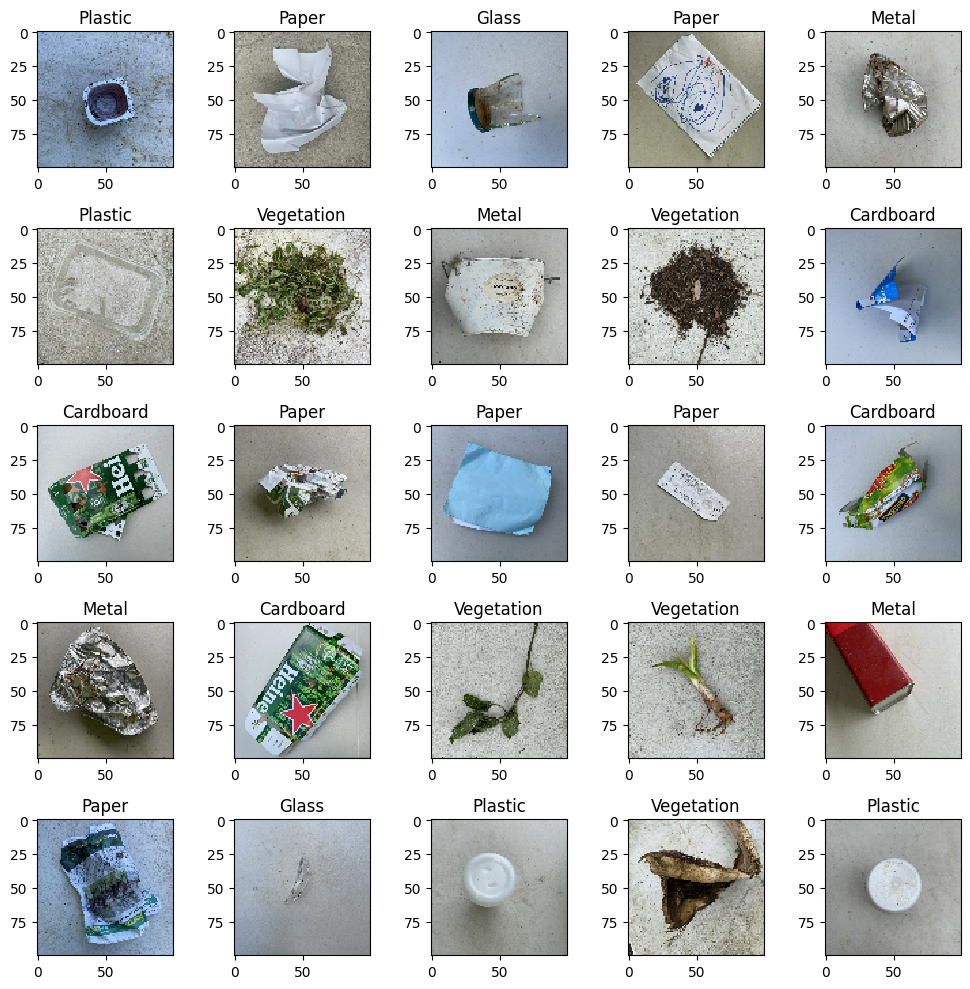

In [ ]:
# Change the default figure size for all plots created in the program
plt.rcParams['figure.figsize'] = (10,10)

labels = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Vegetation']

for i in range(25):
    # plt.subplot() function takes three integer arguments: the number of rows, the number of columns, and the index of the subplot.
    plt.subplot(5, 5, i+1)
    # plt.imshow() function displays the image at index i in the X_train array as a grayscale image, with no interpolation applied.
    plt.imshow(X_train[i], interpolation='none')
    # Use np.argmax to convert one-hot encoded labels to class indices
    plt.title("{}".format(labels[np.argmax(Y_train[i])]))

plt.tight_layout()
plt.show()

<a id = "cell_model"></a>
## 3. Predictive Modeling

**CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers

The model begins with a **Convolutional** layer that has 32 filters and a 2x2 kernel size. This layer scans the images for basic patterns. The second Conv2D layer uses 64 filters, also with a 2x2 kernel, to extract more complex features from the images. The third Conv2D layer increases to 128 filters, still with a 2x2 kernel, allowing the model to capture finer details. Finally, the fourth Conv2D layer expands to 256 filters, enabling the model to recognize the most intricate patterns in the images.

After each of the first 3 Conv2D layers, a **MaxPooling** layer is applied to shrink the size of the feature maps. This down-sampling step helps reduce the amount of computation needed in the following layers while still keeping the most important information. The pooling size is 3x3, which efficiently reduces the feature maps' size and improves the model’s ability to generalise to new data.

Once the convolutional and pooling layers have processed the images, the 2D feature maps are flattened into a 1D vector using a **Flatten** layer. This step prepares the data for the next part of the network, allowing it to connect with the fully connected (dense) layers for further processing.

The first **dense (hidden)** layer has 512 neurons, followed by a **Dropout** layer with a rate of 0.6. This Dropout layer helps prevent overfitting by randomly turning off 60% of the neurons during training, encouraging the model to learn stronger, more generalisable features. The second dense layer has 256 neurons, which continues refining the information learned from the earlier layers.

The final **output** layer has **6 neurons**, one for each of the six categories, and uses a **softmax** activation function. This function transforms the outputs into probability values for each class, enabling the model to make its classification prediction by selecting the most likely category.

In [ ]:
# Building a CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(100, 100, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(256, kernel_size=(2, 2), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

To avoid overfitting, **early stopping** was used. This technique monitored the validation loss and stopped the training if there was no improvement after 20 consecutive epochs. This approach helped ensure that the model didn’t over-train on the data, allowing it to perform better on unseen test data by avoiding the risk of losing its ability to generalize well.

In [ ]:
# Keras callbacks (when Tensorboard installed)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

In [ ]:
# Create the model
model = create_cnn_model()

# Compile the model
model.compile( loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, batch_size=128, epochs=100, verbose=2, validation_data=(X_test, Y_test), validation_split=0.2, callbacks=keras_callbacks)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 33, 33, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 33, 33, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 256)           │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,485,926 (5.67 MB)

 Trainable params: 1,485,926 (5.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 - 33s - 2s/step - accuracy: 0.2071 - loss: 1.7801 - val_accuracy: 0.2256 - val_loss: 1.7277
Epoch 2/100
16/16 - 41s - 3s/step - accuracy: 0.3214 - loss: 1.6179 - val_accuracy: 0.3128 - val_loss: 1.5254
Epoch 3/100
16/16 - 39s - 2s/step - accuracy: 0.4162 - loss: 1.4194 - val_accuracy: 0.5105 - val_loss: 1.2951
Epoch 4/100
16/16 - 29s - 2s/step - accuracy: 0.4815 - loss: 1.3040 - val_accuracy: 0.5407 - val_loss: 1.2968
Epoch 5/100
16/16 - 23s - 1s/step - accuracy: 0.5424 - loss: 1.1851 - val_accuracy: 0.5884 - val_loss: 1.1258
Epoch 6/100
16/16 - 42s - 3s/step - accuracy: 0.5739 - loss: 1.0915 - val_accuracy: 0.6174 - val_loss: 1.0081
Epoch 7/100
16/16 - 46s - 3s/step - accuracy: 0.6257 - loss: 0.9848 - val_accuracy: 0.6093 - val_loss: 0.9934
Epoch 8/100
16/16 - 40s - 3s/step - accuracy: 0.6262 - loss: 0.9435 - val_accuracy: 0.6035 - val_loss: 0.9885
Epoch 9/100
16/16 - 24s - 2s/step - accuracy: 0.6312 - loss: 1.0008 - val_accuracy: 0.6221 - val_loss: 0.9673
Epoch 10/1

The model was trained for **43 epochs** with a batch size of **128**. During training, the model’s weights were continuously adjusted to reduce the **categorical cross-entropy loss** and improve its predictions.

As training progressed, the model's accuracy steadily improved, while the **validation loss** was closely monitored to ensure it didn’t overfit the data. After 43 epochs, the model achieved the following results on the test set:
**Test accuracy**: 77.79 % and **Validation loss**: 0.9582.

Test loss: 0.9582364559173584
Test accuracy: 0.7779069542884827


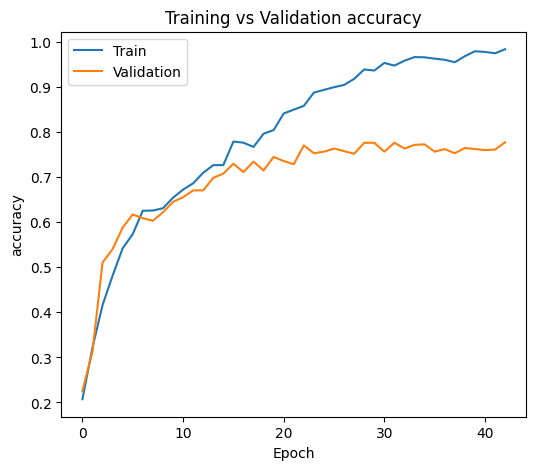

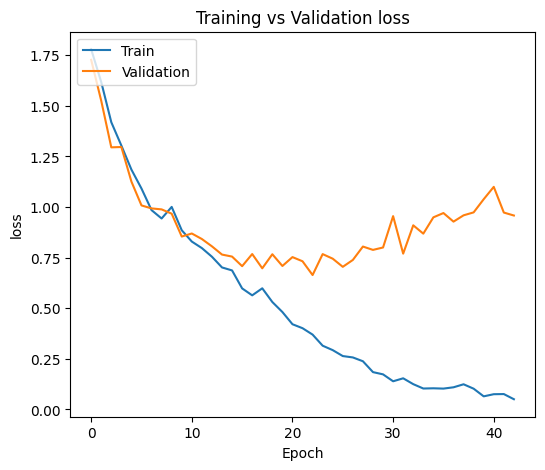

In [ ]:
import math
import pandas as pd

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

# Plot the training history
plot_hist(pd.DataFrame(history.history))

**Training vs. Validation accuracy over 43 epochs**: Throughout the training process, the model's accuracy steadily improved, reaching nearly **98%** by the end. The **validation accuracy** also improved but remained slightly lower, leveling off at around **77%** by the end of the 43 epochs. The small difference between training and validation accuracy suggests a bit of overfitting, but overall, the model still performed well and was able to generalize effectively to new data.

**Training vs. Validation loss over 43 epochs**: Both the **training** and **validation loss** consistently decreased over time, with the validation loss starting to level off around **20 epochs**, signaling a good point to watch for overfitting. The final validation loss of **0.9582** shows that the model wasn't overfitting excessively and maintained its ability to generalize well to new data.



In [ ]:
from sklearn.metrics import classification_report, cohen_kappa_score

# Class names for your six classes
class_names = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Vegetation']

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(Y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names=class_names)

# Print the classification report
print("The result of the classification report is: \n", report)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step
The result of Kappa is : 0.733
The result of the classification report is: 
               precision    recall  f1-score   support

   Cardboard       0.77      0.73      0.75       132
       Glass       0.74      0.85      0.79       131
       Metal       0.77      0.74      0.75       167
       Paper       0.79      0.78      0.78       153
     Plastic       0.65      0.64      0.64       155
  Vegetation       0.98      0.99      0.98       122

    accuracy                           0.78       860
   macro avg       0.78      0.79      0.78       860
weighted avg       0.78      0.78      0.78       860



In [ ]:
y_pred

array([[9.7743927e-05, 3.0537856e-06, 9.9569806e-05, 9.8379111e-01,
        1.6000105e-02, 8.4798176e-06],
       [3.4079126e-09, 1.2851869e-07, 4.5375200e-11, 7.9613249e-09,
        5.4330576e-09, 9.9999982e-01],
       [1.0119351e-07, 2.1390063e-09, 5.7651073e-04, 4.0689771e-05,
        9.9938267e-01, 7.3990667e-09],
       ...,
       [2.7116530e-05, 6.7667052e-06, 6.1131362e-03, 2.0922632e-03,
        9.9175477e-01, 5.8587593e-06],
       [7.3066958e-10, 2.5728292e-10, 1.0823695e-12, 1.9790388e-08,
        4.1332924e-09, 1.0000000e+00],
       [9.9996328e-01, 4.0925549e-08, 8.7616400e-11, 3.6567384e-05,
        1.1033176e-07, 2.0248596e-09]], dtype=float32)

**Generate Confusion Matrix for inspection.**

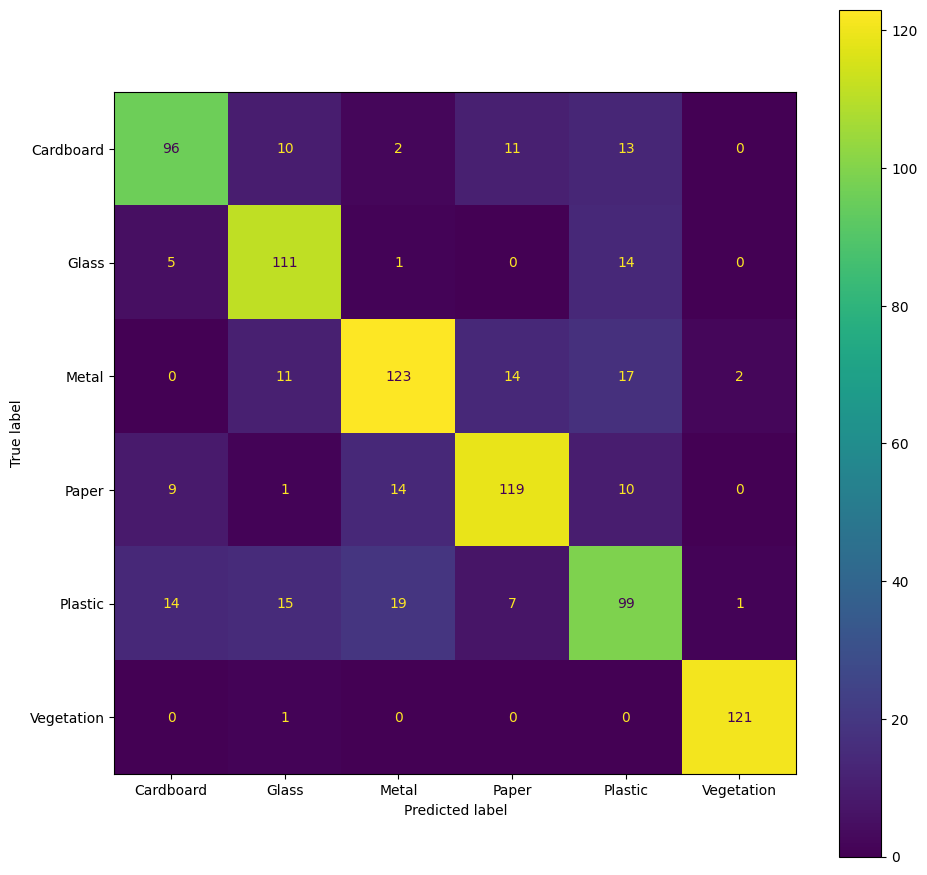

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

**Confusion Matrix**

**Vegetation** was the model’s best-performing class, with **121 correct predictions out of 122 samples**, showing that the model was highly accurate in identifying vegetation compared to other waste types.

**Glass** also performed well, with **111 correct predictions out of 131 samples**, although there were some misclassifications, particularly with **Plastic**.

**Plastic**, on the other hand, had the lowest performance, with only **99 correct predictions out of 155 samples**. The model struggled to distinguish Plastic from other materials like **Cardboard** and **Glass**, possibly because these materials share similar visual features or because the dataset needs more varied examples to help the model learn the differences better.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


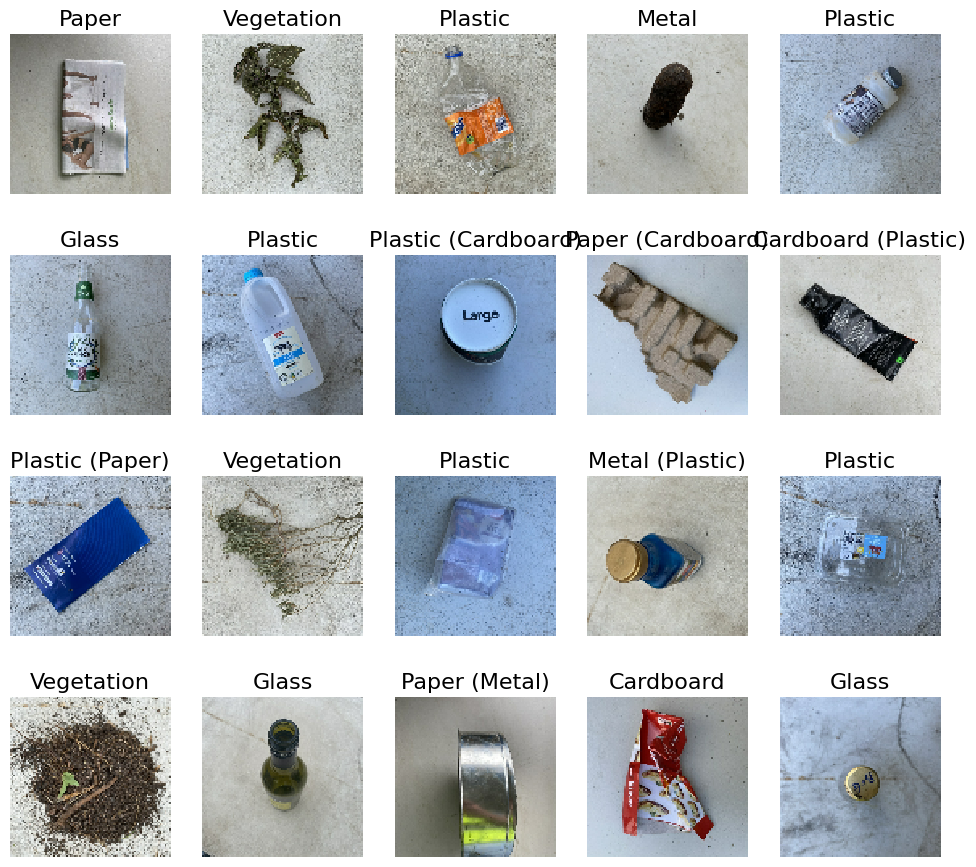

In [ ]:
# Set up parameters for images
img_range = range(20)
imgs = X_test[img_range]  # Select a range of test images
true_labels = [class_names[np.argmax(x)] for x in Y_test[img_range]]  # True labels of the selected images

# Make predictions on the selected images
predictions = model.predict(imgs)
pred_labels = [class_names[np.argmax(x)] for x in predictions]  # Predicted labels for the images

# Create titles for the images indicating if the prediction was correct or not
titles = [pred_labels[x] + ('' if true_labels[x] == pred_labels[x] else ' (' + true_labels[x] + ')') for x in img_range]

# Plot the images with predicted and true labels
plot_images(imgs, cols=5, figsize=(12, 11), titles=titles)


The model successfully identified most of the test images, particularly for categories like **Vegetation** and **Glass**, which had high accuracy.

However, there were some misclassifications, especially between **Plastic**, **Cardboard**, and **Paper**, likely because these materials have similar visual features, making it harder for the model to tell them apart.

This observation is supported by the **confusion matrix**, which shows higher misclassification rates for **Plastic** and **Cardboard**. To improve the model’s ability to differentiate these materials, techniques like better **feature extraction** or **data augmentation** could be helpful.

<a id = "cell_report"></a>
## 4. Experiments Report

We tried out different CNN architectures, adjusting the number of convolutional layers, hidden layers, hidden nodes, pooling layers, dropout rates, and the size of the kernels, to see how these changes could enhance the model's classification accuracy.

Among these architectures, **Model CNN 6** emerged as the best-performing configuration. It consisted of four convolutional layers with kernel sizes of 2x2, followed by 3 MaxPooling layers to reduce dimensionality, and two fully connected dense (hidden) layers. This model achieved the highest accuracy and performed well across most waste classes.

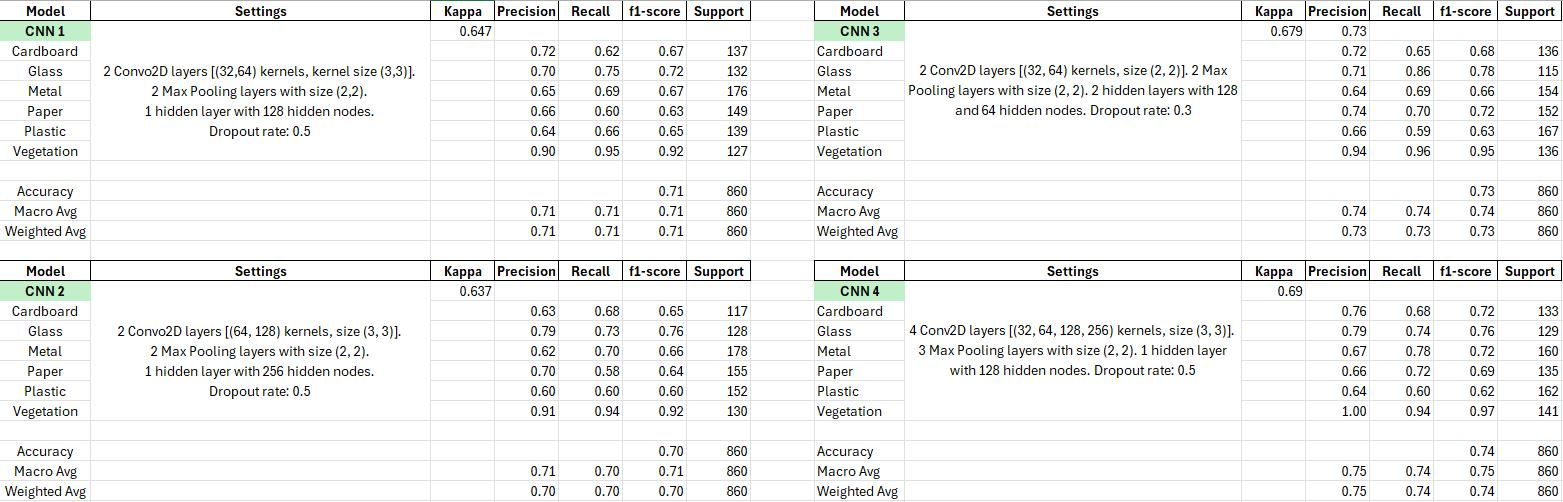

**Best Model (CNN 6)**:

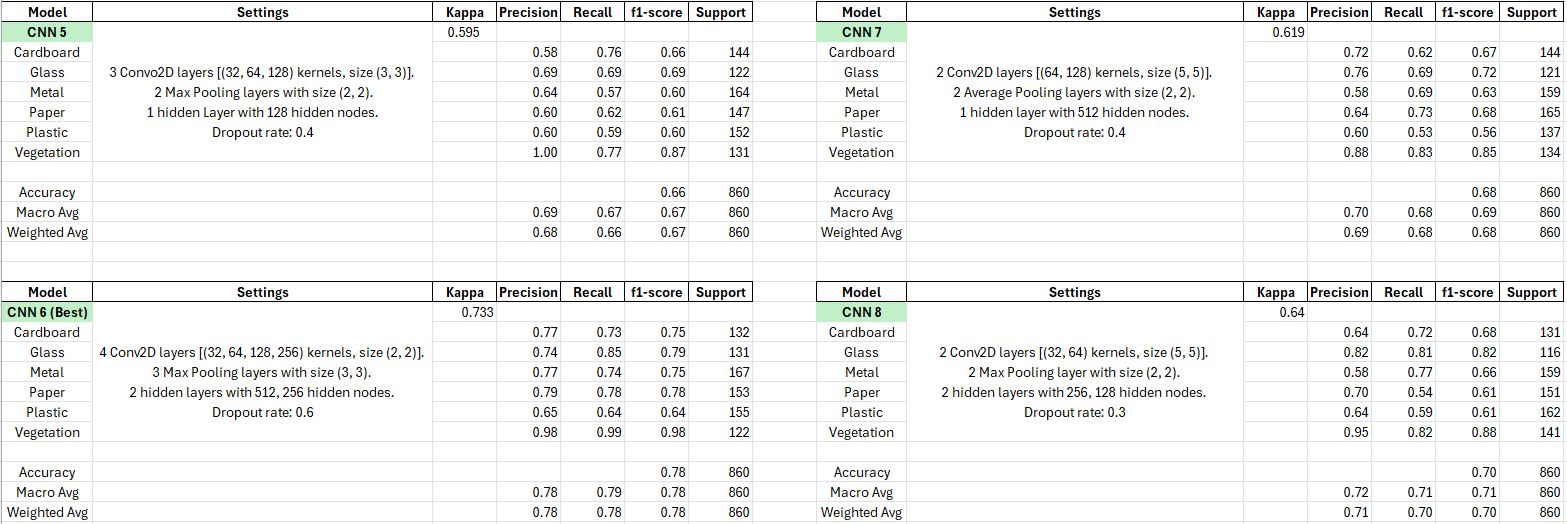

**Vegetation** was the most accurately classified category, with a **precision** of 0.98, **recall of 0.99**, and an **F1-score** of 0.98.

In contrast, **Plastic** had the lowest performance (worst performing class), with a **precision** of 0.65 and an **F1-score** of 0.64, showing that the model had difficulty accurately identifying this class. This is likely because **Plastic** shares visual similarities with other materials like **Cardboard** and **Paper**, leading to frequent misclassifications.

The **Kappa** score of **0.733** indicates a solid level of agreement between the model's predictions and the actual classifications, highlighting the overall reliability and strength of the model.

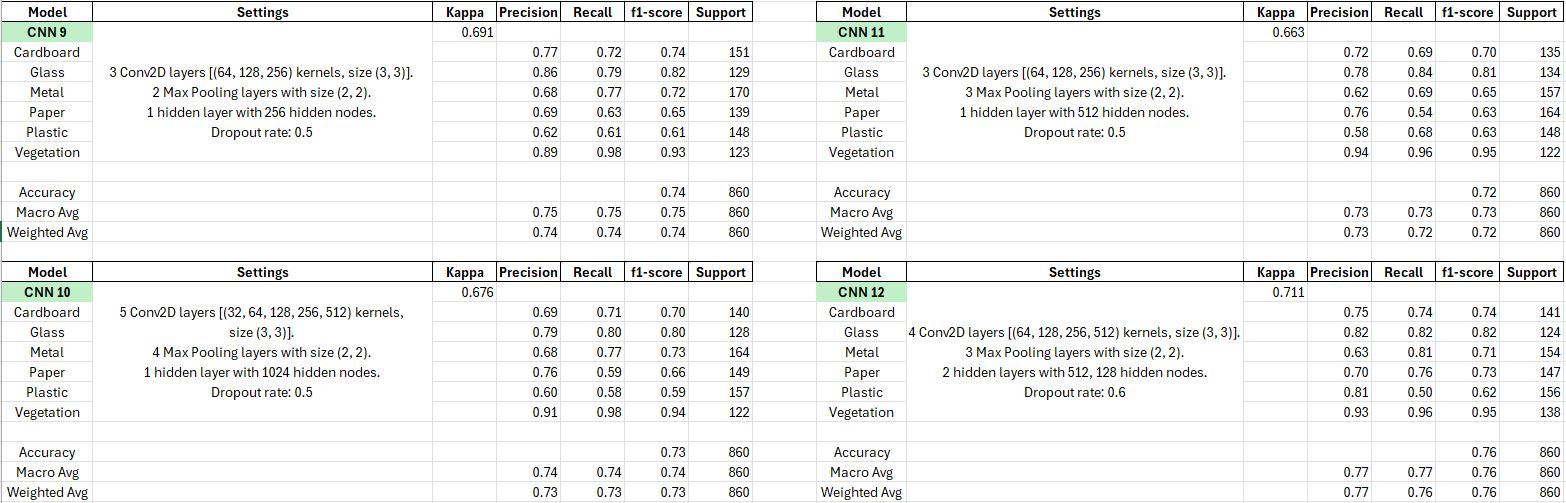

The best model, which included four Convolutional layers, achieved a **test accuracy** of 77.79%, performing well across most categories. The **classification report** and **confusion matrix** showed that **Vegetation** was the easiest class for the model to classify, while **Plastic** was the most difficult. To improve the model's performance, especially for the challenging classes like Plastic, techniques such as **data augmentation** or using **pre-trained models** could be explored.

**Addressing the Business Problem**

The CNN model developed for waste classification provides a practical solution for the waste management company. With an accuracy of **77.79%**, the model can automate the sorting of six different waste types, reducing the need for manual labor and minimizing human error. By implementing this model, the company can significantly enhance the efficiency of waste sorting, leading to:

1. **Higher recycling rates**: Automating the classification process ensures that more waste is accurately identified and directed to the correct recycling streams.
2. **Cost savings**: Automated sorting reduces dependence on manual labor, lowering operational costs.
3. **Improved sustainability**: More efficient sorting leads to higher recycling rates, reducing landfill waste and supporting a more sustainable waste management approach.

In real world scenario, this model could be integrated into a larger automated system with sensors and cameras placed along conveyor belts in waste sorting facilities. As the waste moves along the belt, the system would classify each item and direct it to the correct bin based on the model's predictions. This would greatly reduce the chances of manual sorting errors and enable the facility to process larger amounts of waste more efficiently.

**Improving performance for Real-World Deployment:**

1. **Handling Class Imbalance**: Misclassifications, especially for Plastic and Cardboard, are partly due to imbalanced data. To fix this, we can gather more diverse examples for these classes or use strategies like oversampling or cost-sensitive learning to boost accuracy.

2. **Data Augmentation and Additional Training**: Since the model struggles with distinguishing classes like Plastic due to similarities with other materials, techniques like rotating, flipping, or scaling images can expand the training data and help the model generalize better, improving performance.

3. **Scalability and Real-time Processing**: In real-world settings, the model will need to process large volumes of data quickly. Optimizing the model and leveraging powerful resources like GPUs will ensure fast, accurate predictions without delays.

4. **Integration with Existing Systems**: To work effectively in a waste sorting facility, the model needs to integrate smoothly with current equipment like cameras, conveyor belts, and robotic systems. Backup solutions should be in place to handle errors or misclassifications, allowing for manual intervention if needed.

5. **Model Retraining**: As waste types evolve, the model will need to stay up to date by being retrained with new data. Setting up a routine for ongoing updates will help keep the model accurate over time.

<a id = "cell_report"></a>
## 5. References

1. Chollet, F. (2015). Keras. GitHub. https://github.com/fchollet/keras

2. Kingma, D. P., & Ba, J. (2014). Adam: A method for stochastic optimization. arXiv. https://arxiv.org/abs/1412.6980

3. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://jmlr.org/papers/v12/pedregosa11a.html

4. TensorFlow Developers. (2023). TensorFlow. TensorFlow. https://www.tensorflow.org